In [17]:
import pandas as pd
import sklearn.cluster
import sklearn.decomposition

import os.path
import sys

%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("src"), "../src")))

%aimport features.normalizer
%aimport features.tools
%aimport data.tools
%aimport data.snamptcscs
%aimport models
%aimport visualization.simple

In [28]:
import data.snamptcscs

import features.normalizer
import features.tools

import visualization.simple

In [42]:
data_frame, columns1 = data.snamptcscs.data_set()
data_frame.head()

,Date,SNAMPTCSCS_A,SNAMPTCSCS_B,SNAMPTCSCS_C,SNAMPTCSCS_D,SNAMPTCSCS_E,SNAMPTCSCS_F,SNAMPTCSCS_G,SNAMPTCSCS_H,SNAMPTCSCS_I,...,SNAMPTCSCS_L,SNAMPTCSCS_M,SNAMPTCSCS_N,SNAMPTCSCS_O,SNAMPTCSCS_P,SNAMPTCSCS_Q,SNAMPTCSCS_R,SNAMPTCSCS_S,SNAMPTCSCS_T,SNAMPTCSCS_U
0,1984,13464,9996,12255,32464.0,18169.0,29858.0,28479.0,19090.0,26796.0,...,15613.0,11752.0,9443.0,10090.0,10063.0,7754.0,9619.0,3959.0,4062.0,3990.0
1,1985,14430,10718,13127,34827.0,20493.0,32238.0,29764.0,19682.0,27774.0,...,16493.0,12236.0,10011.0,10634.0,10813.0,8359.0,10341.0,4046.0,4243.0,4103.0
2,1986,15212,11302,13829,38614.0,21135.0,35338.0,31047.0,20478.0,28868.0,...,17091.0,13034.0,10532.0,11250.0,11311.0,8761.0,10825.0,4574.0,4602.0,4582.0
3,1987,15639,11590,14208,37625.0,23259.0,34756.0,32814.0,22960.0,30897.0,...,17147.0,12544.0,10653.0,11171.0,11470.0,8863.0,10990.0,4588.0,4455.0,4546.0
4,1988,16093,11991,14622,38799.0,23298.0,35531.0,33692.0,23760.0,31626.0,...,17391.0,12780.0,10893.0,11402.0,11745.0,9050.0,11255.0,4788.0,4713.0,4763.0


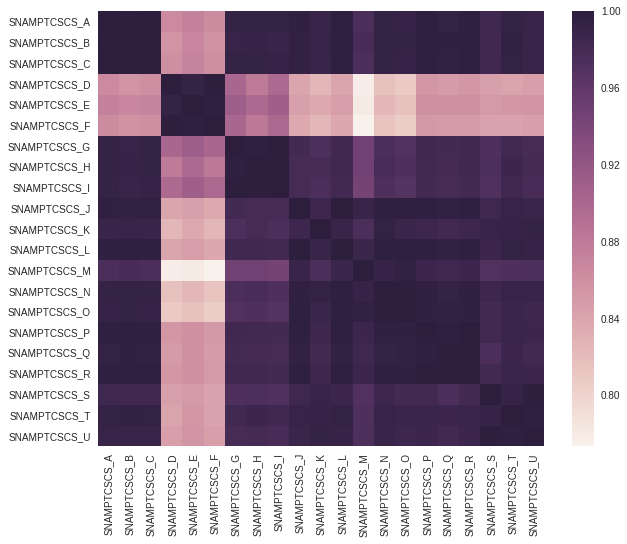

In [46]:
wd_data = data_frame.copy().drop("Date", axis=1)
corr = wd_data.corr()

visualization.simple.heat_map(corr, corr.columns.values, corr.columns.values, (10, 8))

In [47]:
norm_data = data_frame.copy().drop("Date", axis=1)
norm_data = features.normalizer.simple_min_max(norm_data)
norm_data = pd.concat([norm_data, data_frame[["Date"]]], axis=1)

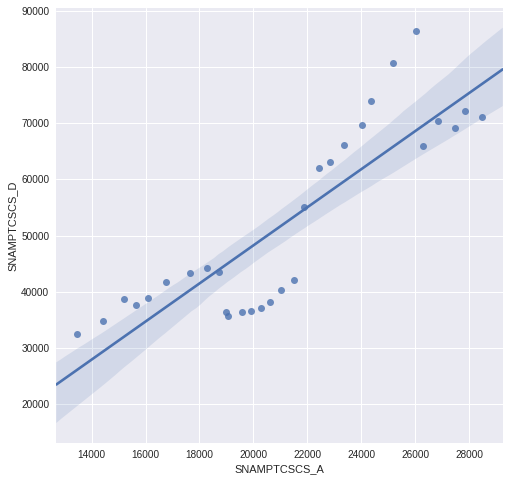

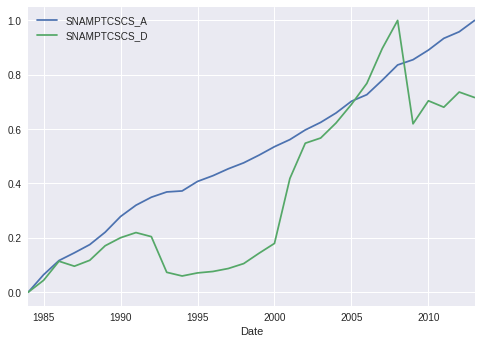

In [57]:
visualization.simple.linear_regression(data_frame, "SNAMPTCSCS_A", "SNAMPTCSCS_D", (8, 8))
visualization.simple.temporal(norm_data, ["SNAMPTCSCS_A", "SNAMPTCSCS_D"])

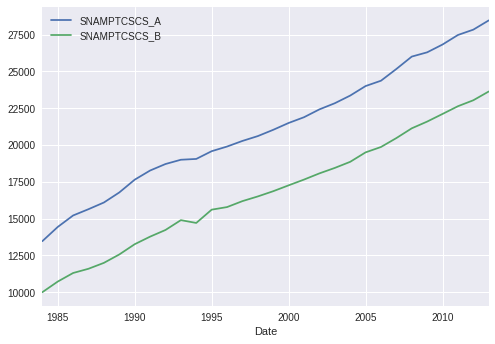

In [58]:
visualization.simple.temporal(data_frame, ["SNAMPTCSCS_A", "SNAMPTCSCS_B"])

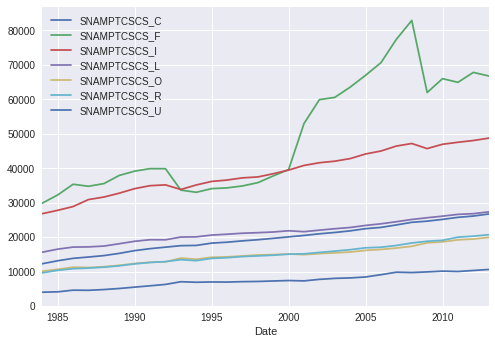

In [67]:
data_all = data_frame[["Date", "SNAMPTCSCS_C", "SNAMPTCSCS_F","SNAMPTCSCS_I", "SNAMPTCSCS_L",
                                           "SNAMPTCSCS_O", "SNAMPTCSCS_R", "SNAMPTCSCS_U"]]
visualization.simple.temporal(data_all)

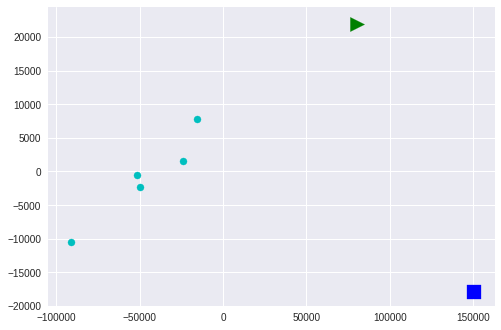

In [68]:
s_data = data_all.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)

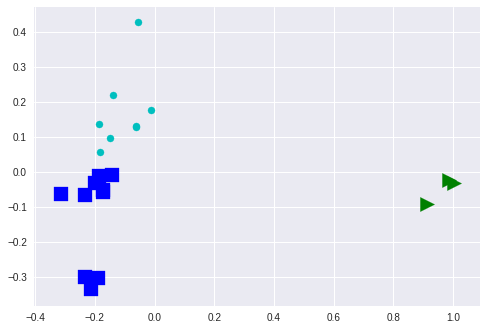

In [69]:
s_data = norm_data.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)